In [1]:
import sys

sys.path.append('../')

import keras4torch as k4t
import torch
from torch import nn
from sklearn.datasets import load_iris
import numpy as np
from keras4torch.metrics import accuracy

In [2]:
X, y = load_iris(return_X_y=True)
X = X.astype(np.float32)
y = y.astype(np.int64)

In [3]:
model = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(),
    nn.Sequential(
        nn.Linear(128, 64), nn.ReLU()
    ),
    nn.Linear(64, 3)
)

model = k4t.Model(model)

In [4]:
model.compile(optimizer=torch.optim.Adam(model.parameters(), lr=3e-4),
                loss=nn.CrossEntropyLoss(),
                metrics={'acc': accuracy},
                )

In [5]:
model.summary(input_shape=[4])

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 128]                 640
├─ReLU: 1-2                              [-1, 128]                 --
├─Sequential: 1-3                        [-1, 64]                  --
|    └─Linear: 2-1                       [-1, 64]                  8,256
|    └─ReLU: 2-2                         [-1, 64]                  --
├─Linear: 1-4                            [-1, 3]                   195
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04


In [6]:
def f(trainer):
    print(trainer.epoch)

history = model.fit(X, y,
            epochs=15,
            validation_split=0.2,
            shuffle_val_split=True,
            callbacks={'on_epoch_start': f}
            )

Train on 120 samples, validate on 30 samples:
1
Epoch 1/15 - 0.0s - loss: 1.1091 - acc: 0.3281 - val_loss: 1.1187 - val_acc: 0.3333 - lr: 3e-04
2
Epoch 2/15 - 0.0s - loss: 1.0629 - acc: 0.3411 - val_loss: 1.0783 - val_acc: 0.3333 - lr: 3e-04
3
Epoch 3/15 - 0.0s - loss: 1.0337 - acc: 0.3411 - val_loss: 1.0498 - val_acc: 0.3333 - lr: 3e-04
4
Epoch 4/15 - 0.0s - loss: 1.0132 - acc: 0.3359 - val_loss: 1.0264 - val_acc: 0.3333 - lr: 3e-04
5
Epoch 5/15 - 0.0s - loss: 0.9926 - acc: 0.3255 - val_loss: 1.0026 - val_acc: 0.3333 - lr: 3e-04
6
Epoch 6/15 - 0.0s - loss: 0.9678 - acc: 0.3438 - val_loss: 0.9824 - val_acc: 0.3333 - lr: 3e-04
7
Epoch 7/15 - 0.0s - loss: 0.9489 - acc: 0.4818 - val_loss: 0.9605 - val_acc: 0.4333 - lr: 3e-04
8
Epoch 8/15 - 0.0s - loss: 0.9273 - acc: 0.6328 - val_loss: 0.9391 - val_acc: 0.6000 - lr: 3e-04
9
Epoch 9/15 - 0.0s - loss: 0.9090 - acc: 0.6562 - val_loss: 0.9205 - val_acc: 0.7000 - lr: 3e-04
10
Epoch 10/15 - 0.0s - loss: 0.8905 - acc: 0.6615 - val_loss: 0.8980 - 

<AxesSubplot:>

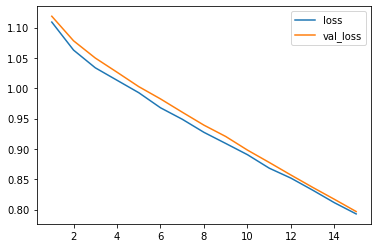

In [7]:
history.plot(kind='line', y=['loss', 'val_loss'])

In [8]:
model.evaluate(X, y)

OrderedDict([('loss', 0.78543985), ('acc', 0.6875)])

In [9]:
model.predict(X)

array([[ 3.71902883e-01, -2.76607305e-01, -2.34585196e-01],
       [ 2.71633446e-01, -2.03298137e-01, -1.81708753e-01],
       [ 3.43581617e-01, -2.53481060e-01, -2.14813828e-01],
       [ 2.60743022e-01, -2.12340578e-01, -1.88564837e-01],
       [ 3.84693265e-01, -2.92338759e-01, -2.40236193e-01],
       [ 3.55770588e-01, -2.96628922e-01, -2.52523065e-01],
       [ 3.40946138e-01, -2.73701042e-01, -2.24360853e-01],
       [ 3.21989417e-01, -2.49005929e-01, -2.18633175e-01],
       [ 2.52995342e-01, -2.00239122e-01, -1.75993681e-01],
       [ 2.61728287e-01, -1.99734047e-01, -1.81727022e-01],
       [ 3.78993332e-01, -2.85344869e-01, -2.43825823e-01],
       [ 2.84673065e-01, -2.38493830e-01, -2.09702224e-01],
       [ 2.72959650e-01, -2.00511917e-01, -1.79598331e-01],
       [ 3.46784234e-01, -2.51673490e-01, -2.00070709e-01],
       [ 4.99664545e-01, -3.44384313e-01, -2.63751566e-01],
       [ 4.79129374e-01, -3.71281773e-01, -2.78339475e-01],
       [ 4.52624857e-01, -3.37098986e-01